# Quantity Prediction Project
by Jasmine Chung

This project is to predict "quantity", using both categorical and numerical data given. The overall content is as following:

1. Business Problem Definition
2. Data Overview
3. Exploratory Data Analysis (EDA)
4. Data Cleaning
5. Feature Engineering
6. Feature Seleection
7. Data Encoding
8. Machine Learning Models
9. Model Selection - Cross Validation
10. Grid Search
11. Learning Curve
12. Pipeline

# 1. Business Problem Definition

Business Scenario: 
- The company faces frequent stockouts of popular products due to limited ability to forecast demand spikes. Additionally, the dynamic pricing and stock conditions of competitors on multiple platforms are difficult to monitor in real-time. 
- As a result, internal inventory and restocking decisions lack data support, increasing operational inefficiencies.

Business Problem:
- Difficulty predicting hot-selling items often leads to stockouts or overstocking.
- Inability to quickly capture competitors’ price changes and stock conditions across platforms.
- Lack of data-driven decision support for internal inventory and replenishment strategies.

Business Objective

- The primary goal is to build a machine learning model to predict the "quantity" of online sales dataset.

# 2. Data Overview 

To begin with, a dataset overview including the brief scan of the head, the understanding of data types, missing values number, and duplication can help further imputation and analysis.

In [180]:
import pandas as pd

# Load the dataset
file_path = 'Supplement_Sales_Weekly_Expanded.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Date,Year,Quarter,Month,Day,ProductName,Category,Quantity,Price,Discount,UnitsReturned,Location,Platform
0,2020/1/6,2020,Q1,January,6,Whey Protein,Protein,143,31.98,0.03,2,Canada,Walmart
1,2020/1/6,2020,Q1,January,6,Vitamin C,Vitamin,139,42.51,0.04,0,UK,Amazon
2,2020/1/6,2020,Q1,January,6,Fish Oil,Omega,161,12.91,0.25,0,Canada,Amazon
3,2020/1/6,2020,Q1,January,6,Multivitamin,Vitamin,140,16.07,0.08,0,Canada,Walmart
4,2020/1/6,2020,Q1,January,6,Pre-Workout,Performance,157,35.47,0.25,3,Canada,iHerb


In [181]:
# Understand the Non-Null Count and Dtype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4384 non-null   object 
 1   Year           4384 non-null   int64  
 2   Quarter        4384 non-null   object 
 3   Month          4384 non-null   object 
 4   Day            4384 non-null   int64  
 5   ProductName    4384 non-null   object 
 6   Category       4384 non-null   object 
 7   Quantity       4384 non-null   int64  
 8   Price          4384 non-null   float64
 9   Discount       4384 non-null   float64
 10  UnitsReturned  4384 non-null   int64  
 11  Location       4384 non-null   object 
 12  Platform       4384 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 445.4+ KB


In [182]:
# Count missing values in every column
df.isnull().sum()

Date             0
Year             0
Quarter          0
Month            0
Day              0
ProductName      0
Category         0
Quantity         0
Price            0
Discount         0
UnitsReturned    0
Location         0
Platform         0
dtype: int64

In [183]:
# Drop the 'id' column temporarily for duplicate checking
# df_no_id = df.drop('id', axis=1)

# Find duplicates (considering all other columns)
duplicates = df.duplicated(keep=False)

# Show the duplicate rows based on the original DataFrame
duplicate_rows = df[duplicates]

# Print the duplicate rows
print(duplicate_rows)


Empty DataFrame
Columns: [Date, Year, Quarter, Month, Day, ProductName, Category, Quantity, Price, Discount, UnitsReturned, Location, Platform]
Index: []


Drop duplicates directly.

In [184]:
# Drop duplicates excluding the 'id' column
# df = df.drop_duplicates(subset=df.columns.difference(['id']))

# Check the DataFrame without duplicates
# print(df.head())
# print(df.info())
# print(df.isnull().sum())

### Comment:
From this overview, it is known that there are categorical and numerical features in this dataset and both of them are with a considerable amount of missing values, suggesting a need to operate systematic imputation for them based on their respective charateristics.

# 3. Exploratory Data Analysis (EDA) 

- In this project, EDA will precede data cleaning.
- This sequencing ensures that the imputation of missing values is informed by an in-depth understanding of the dataset's characteristics. 
- By conducting EDA first, imputation strategies can be tailored to align with the observed patterns of numerical and categorical features.

### ・Numerical Data

In [185]:
# For numerical columns, get descriptive statistics 
df.describe()

,Year,Day,Quantity,Price,Discount,UnitsReturned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,2022.149635,15.751825,150.200274,34.781229,0.124398,1.531478
std,1.522351,8.803609,12.396099,14.198309,0.071792,1.258479
min,2020.000000,1.000000,103.000000,10.000000,0.000000,0.000000
25%,2021.000000,8.000000,142.000000,22.597500,0.060000,1.000000
50%,2022.000000,16.000000,150.000000,34.720000,0.120000,1.000000
75%,2023.000000,23.000000,158.000000,46.712500,0.190000,2.000000
max,2025.000000,31.000000,194.000000,59.970000,0.250000,8.000000


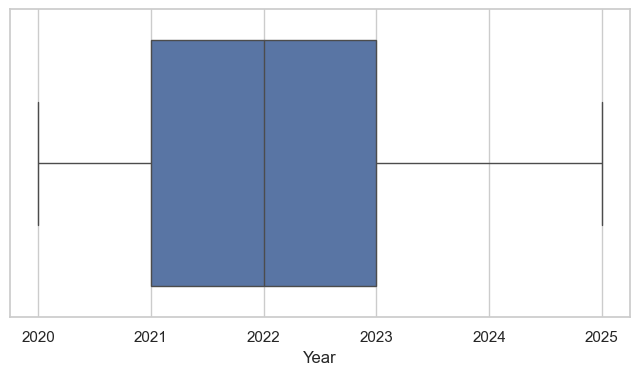

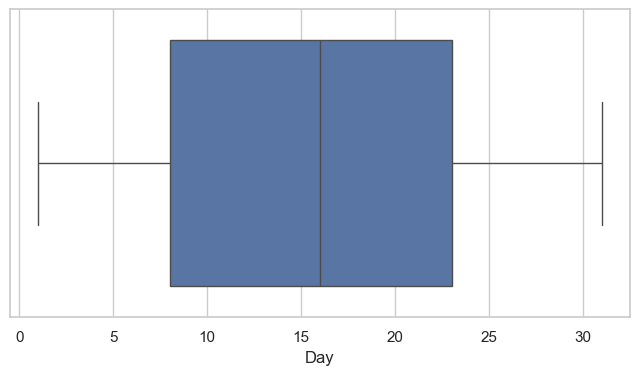

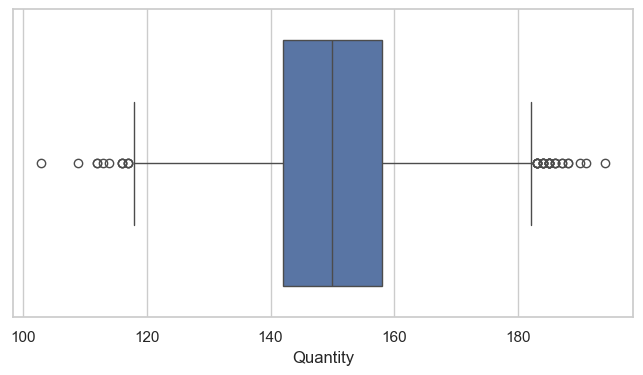

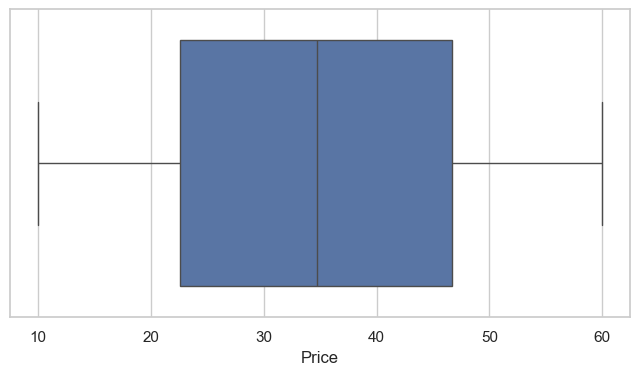

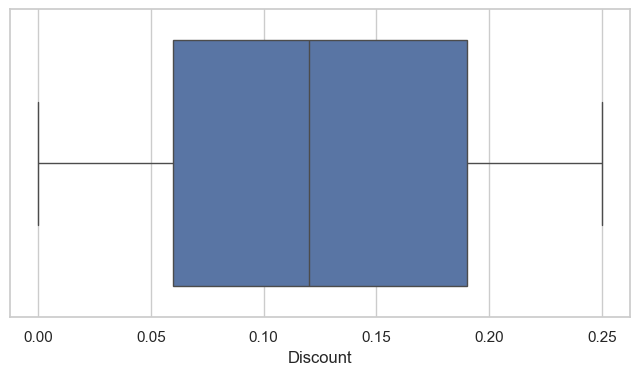

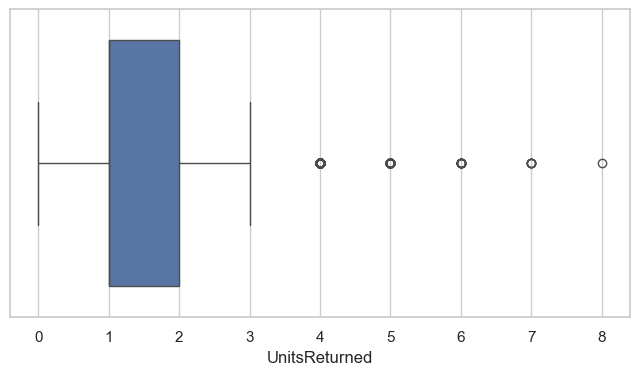

In [186]:
# Box plots are useful for identifying outliers and understanding the spread of the data
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns and exclude 'id'
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Loop through the selected numerical columns and create box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.show()

For numerical columns,  histogram graphs with curved lines are proper in showing the distribution of the data.

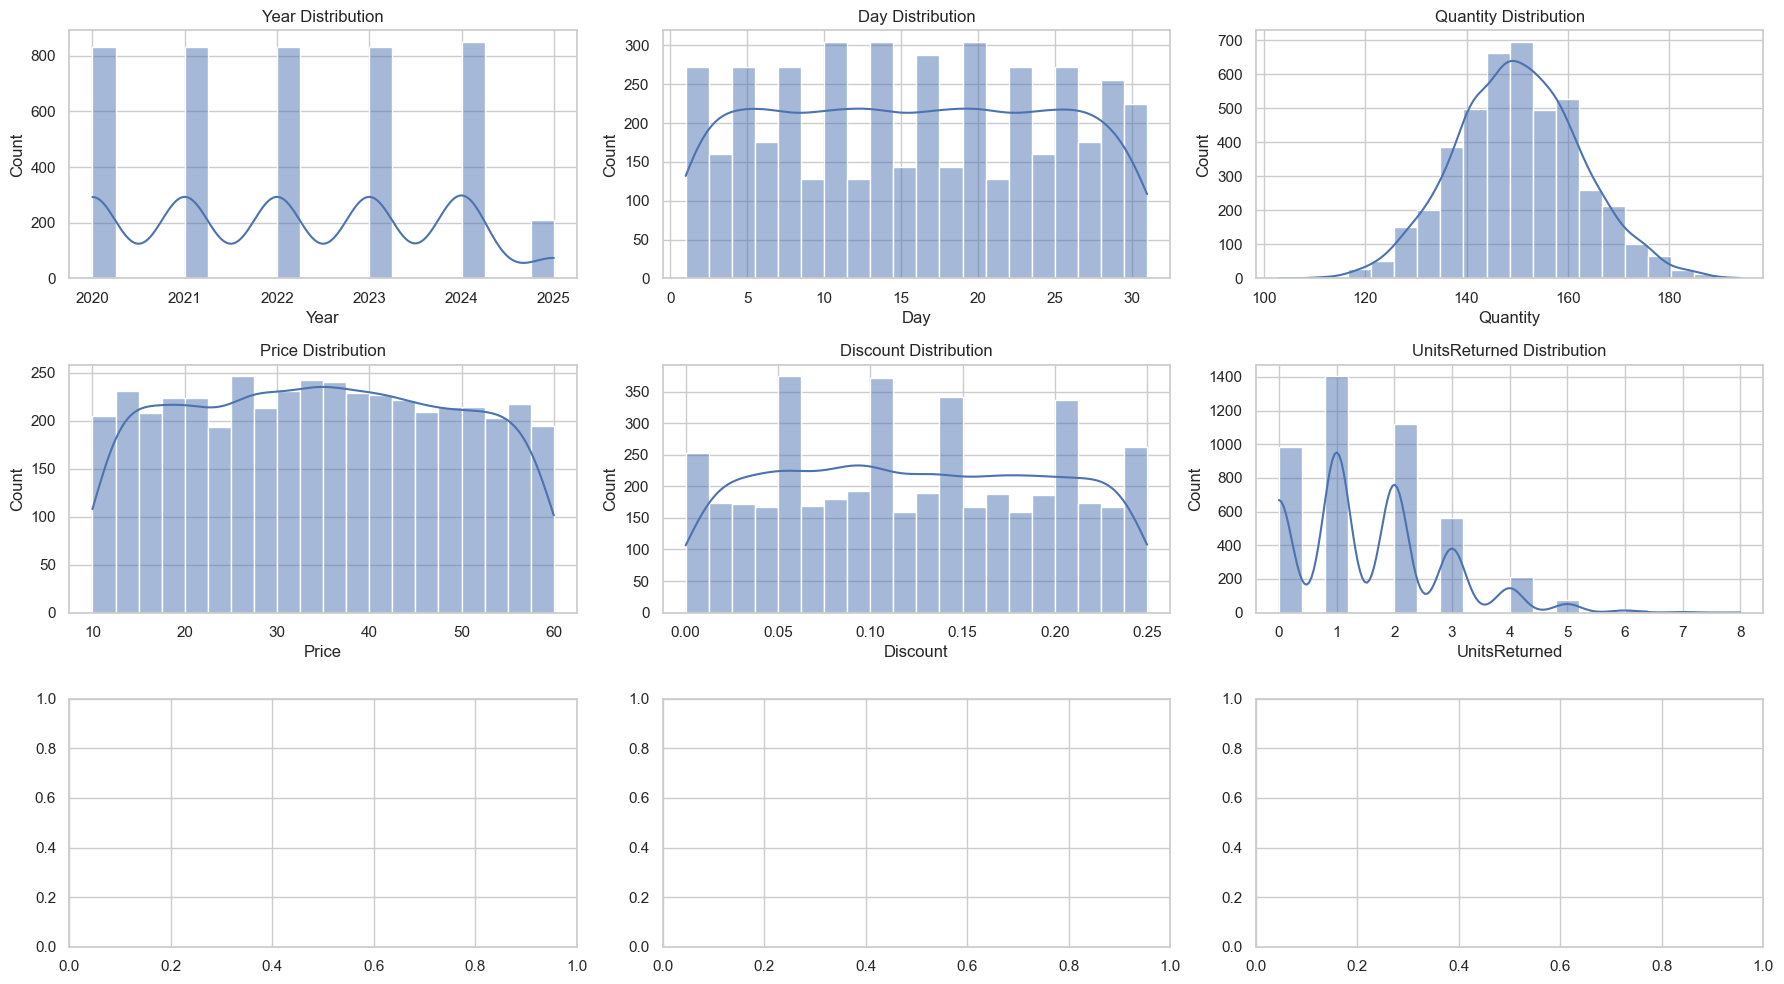

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 數值欄位
num_cols = numerical_cols

# 設定子圖數量
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # 轉成一維方便迴圈處理

# 畫出每個欄位的分布圖
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


### Comment:
Based on the box plots, there are apparent outliers in the distributions. These observations highlight the need to remove outliers during the data cleaning process.

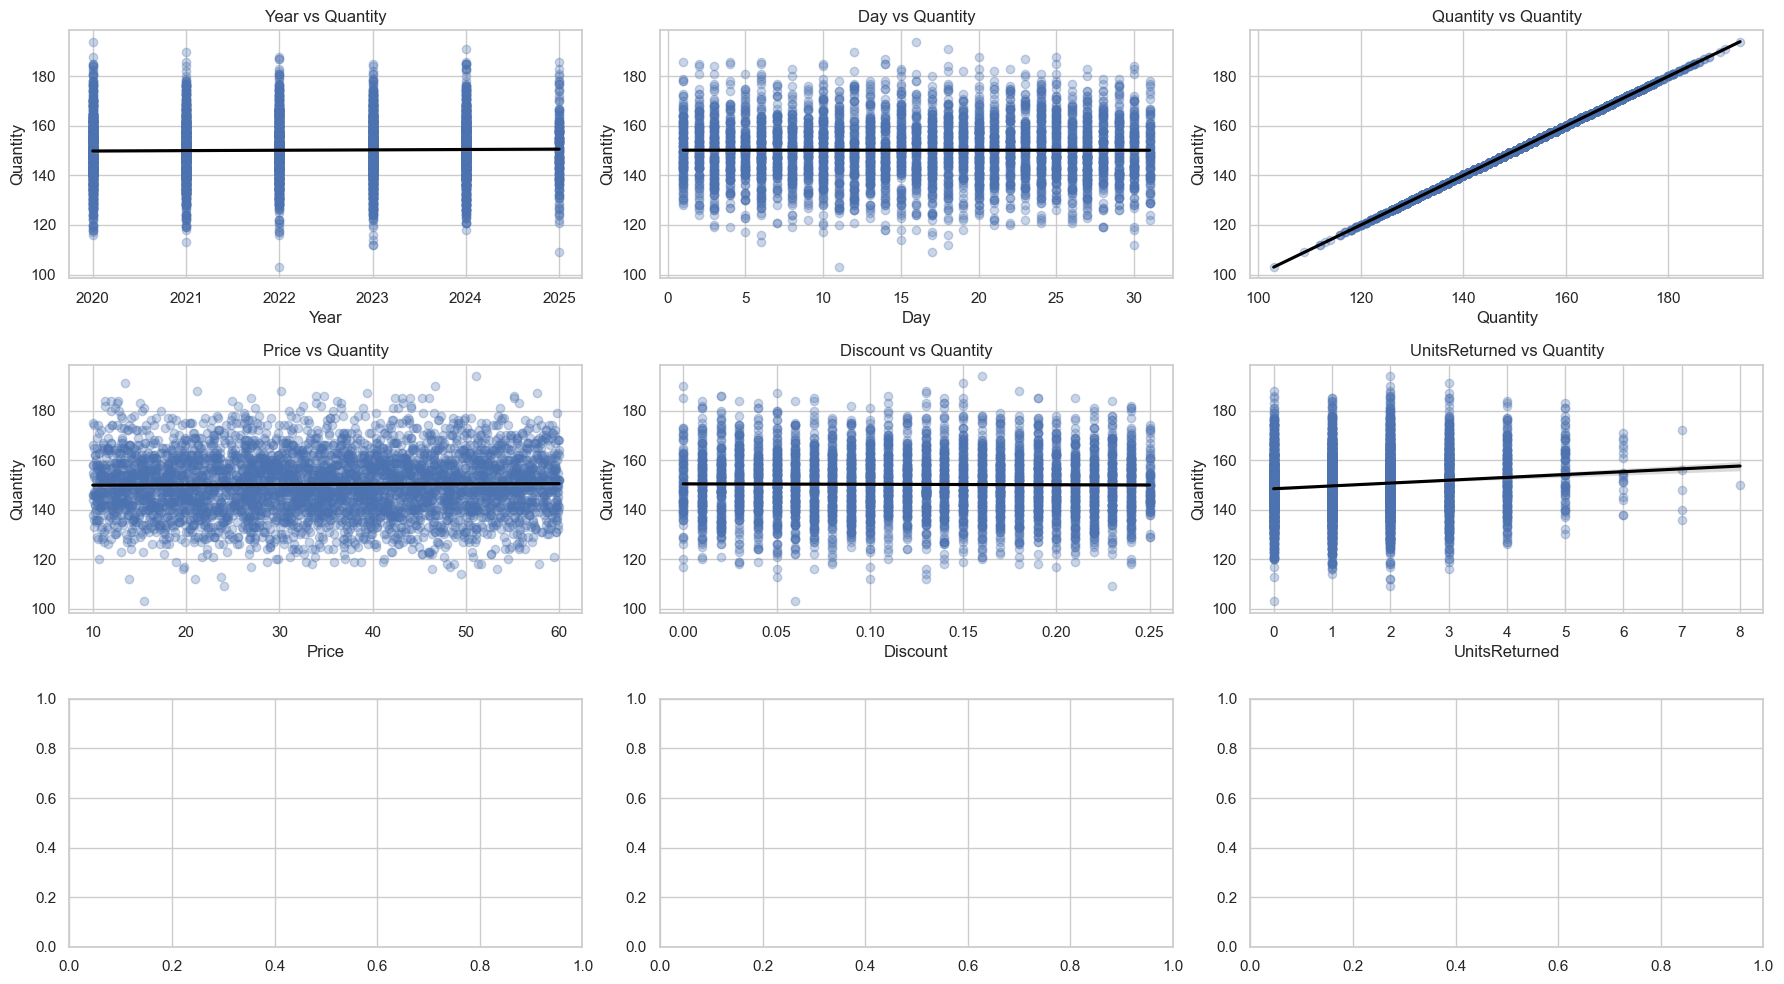

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# num_cols

# set format
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# every num cols to Quantity as a chart
for i, col in enumerate(num_cols):
    sns.regplot(x=df[col], y=df['Quantity'], ax=axes[i], scatter_kws={'alpha':0.3}, line_kws={'color':'black'})
    axes[i].set_title(f'{col} vs Quantity')

# close redundant charts
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [189]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from IPython.display import display

# Step 1: df_num
df_num = df.select_dtypes(include=['float64', 'int64']).copy()

# Step 2
for col in df_num.columns:
    print(f"Column: {col}")
    print(df_num[col].value_counts(dropna=False))
    print("\n")

# Step 3
num_cols = [col for col in df_num.columns if col != 'Quantity']

# Step 4
results = []

# Step 5
for col in num_cols:
    # remove missing values
    temp_df = df_num[[col, 'Quantity']].dropna()

    X = temp_df[[col]]
    y = temp_df['Quantity']

    model = LinearRegression()
    model.fit(X, y)

    results.append({
        'Feature': col,
        'Coefficient': model.coef_[0],
        'Intercept': model.intercept_,
        'R² Score': model.score(X, y)
    })

# Step 6: result
regression_df = pd.DataFrame(results)
display(regression_df)


Column: Year
Year
2024    848
2020    832
2021    832
2022    832
2023    832
2025    208
Name: count, dtype: int64


Column: Day
Day
6     176
13    176
20    176
27    176
3     160
10    160
17    160
24    160
11    144
4     144
15    144
8     144
1     144
25    144
18    144
22    144
23    128
9     128
16    128
2     128
30    128
29    128
7     128
5     128
14    128
21    128
28    128
19    128
12    128
26    128
31     96
Name: count, dtype: int64


Column: Quantity
Quantity
147    159
150    156
148    149
153    147
158    141
      ... 
103      1
113      1
114      1
191      1
109      1
Name: count, Length: 81, dtype: int64


Column: Price
Price
31.37    7
33.39    6
44.34    6
51.58    5
58.55    5
        ..
31.79    1
25.70    1
58.46    1
43.39    1
25.28    1
Name: count, Length: 2919, dtype: int64


Column: Discount
Discount
0.10    200
0.05    194
0.09    193
0.13    189
0.17    188
0.19    186
0.24    185
0.08    180
0.06    180
0.14    178
0.02    173


,Feature,Coefficient,Intercept,R² Score
0,Year,0.150585,-154.305565,3.419987e-04
1,Day,-0.001057,150.216925,5.636397e-07
2,Price,0.012004,149.782777,1.890251e-04
3,Discount,-1.801722,150.424404,1.088815e-04
4,UnitsReturned,1.147761,148.442503,1.357765e-02


### Comment:

- 所有欄位的 R² 都非常低，表示單一變數無法解釋 Quantity 的變異
- UnitsReturned 是唯一有些許解釋力的變數（1.3%）
- 其他像 Year、Day、WeekNo 幾乎無任何意義

### ・Categorical Data

In this dataset, there are cat cols.

In [190]:
print(df.dtypes)

Date              object
Year               int64
Quarter           object
Month             object
Day                int64
ProductName       object
Category          object
Quantity           int64
Price            float64
Discount         float64
UnitsReturned      int64
Location          object
Platform          object
dtype: object


In [191]:
# For categorical columns, find the unique values and their counts
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Date
Date
2025/3/31    16
2020/1/6     16
2020/1/13    16
2020/1/20    16
2020/1/27    16
             ..
2020/6/1     16
2020/6/8     16
2020/6/15    16
2020/6/22    16
2020/6/29    16
Name: count, Length: 274, dtype: int64


Column: Quarter
Quarter
Q1    1248
Q3    1056
Q2    1040
Q4    1040
Name: count, dtype: int64


Column: Month
Month
January      432
March        432
February     384
May          368
August       368
November     352
July         352
October      352
April        336
June         336
September    336
December     336
Name: count, dtype: int64


Column: ProductName
ProductName
Whey Protein          274
Vitamin C             274
Fish Oil              274
Multivitamin          274
Pre-Workout           274
BCAA                  274
Creatine              274
Zinc                  274
Collagen Peptides     274
Magnesium             274
Ashwagandha           274
Melatonin             274
Biotin                274
Green Tea Extract     274
Iron Supplement      

### Comment:
There is a need to convert "Year" alike into categorical features to replace "Date", as they can better represent temporal patterns such as seasonality or time-based buying behavior in a simplified form.

In [192]:
df['Year'] = df['Year'].astype('category')
df['Day'] = df['Day'].astype('category')
df['Day'] = df['Day'].astype('category')


for col in df.columns:
    unique_vals = df[col].nunique()
    total_vals = df[col].count()
    
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

df = df.drop(columns=['Date'], errors='ignore')

print(df.dtypes)

Year             category
Quarter          category
Month            category
Day              category
ProductName      category
Category         category
Quantity            int64
Price             float64
Discount          float64
UnitsReturned       int64
Location         category
Platform         category
dtype: object


As for categorical columns, bar charts are suitable to present the constitution of data in each of them.

C:\Users\2401050\AppData\Local\Temp\ipykernel_56868\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


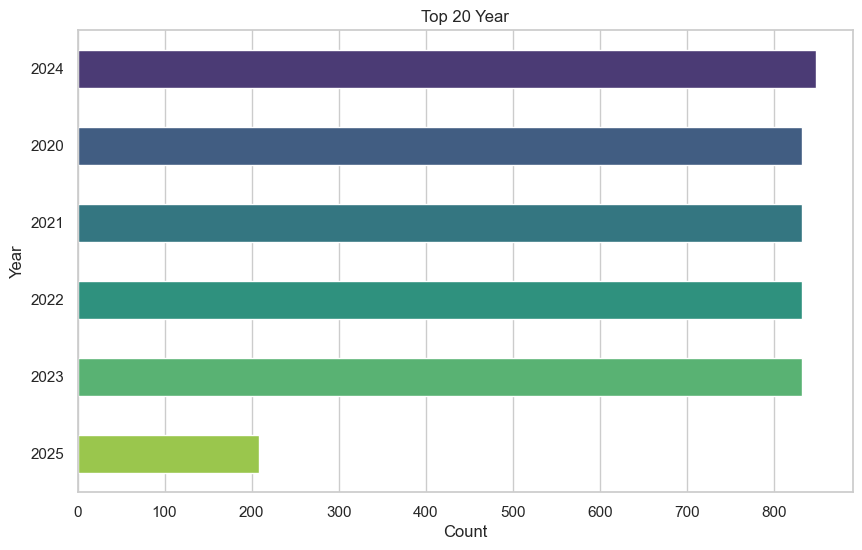

C:\Users\2401050\AppData\Local\Temp\ipykernel_56868\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


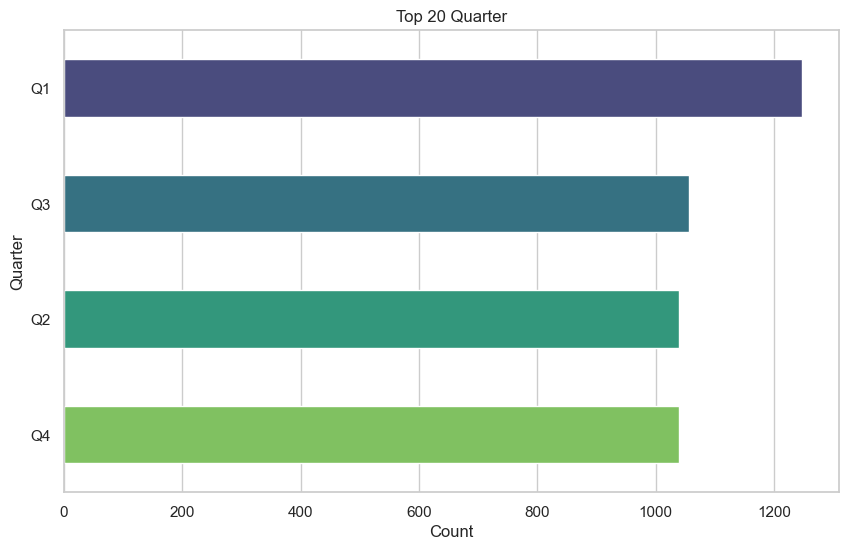

C:\Users\2401050\AppData\Local\Temp\ipykernel_56868\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


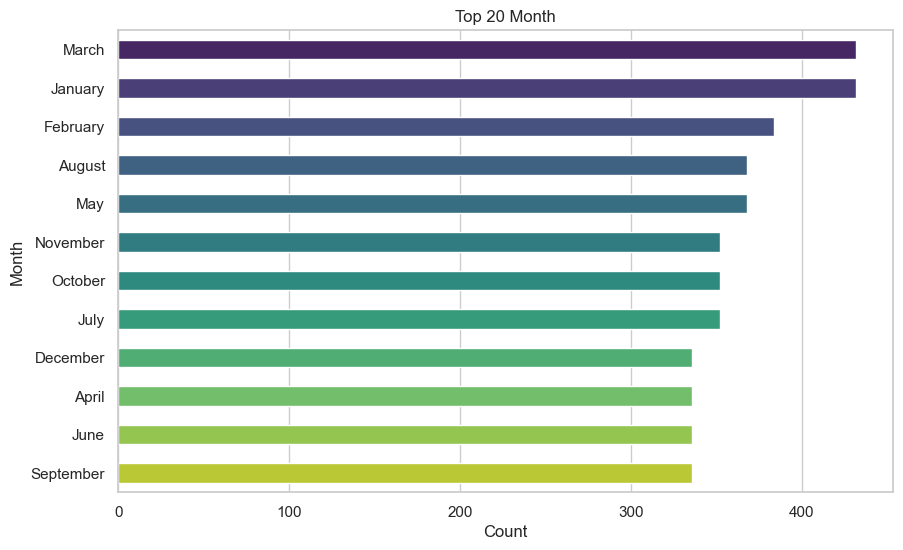

C:\Users\2401050\AppData\Local\Temp\ipykernel_56868\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


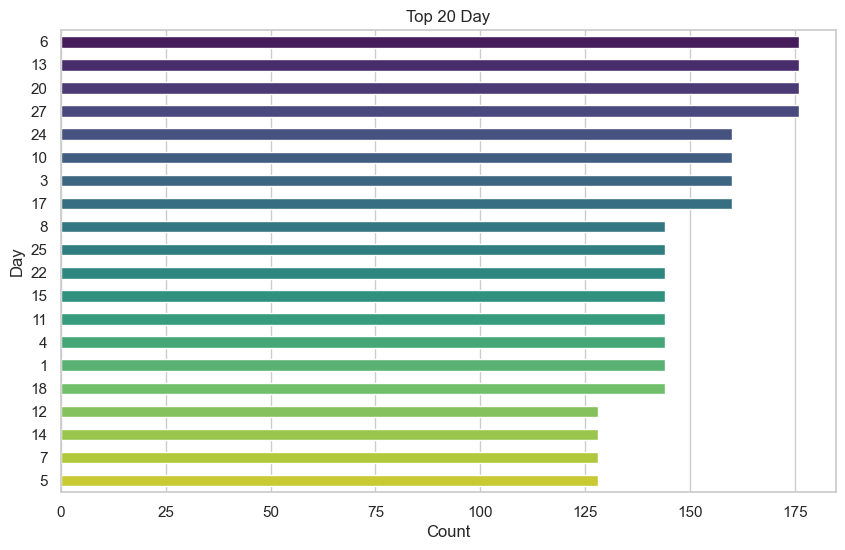

C:\Users\2401050\AppData\Local\Temp\ipykernel_56868\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


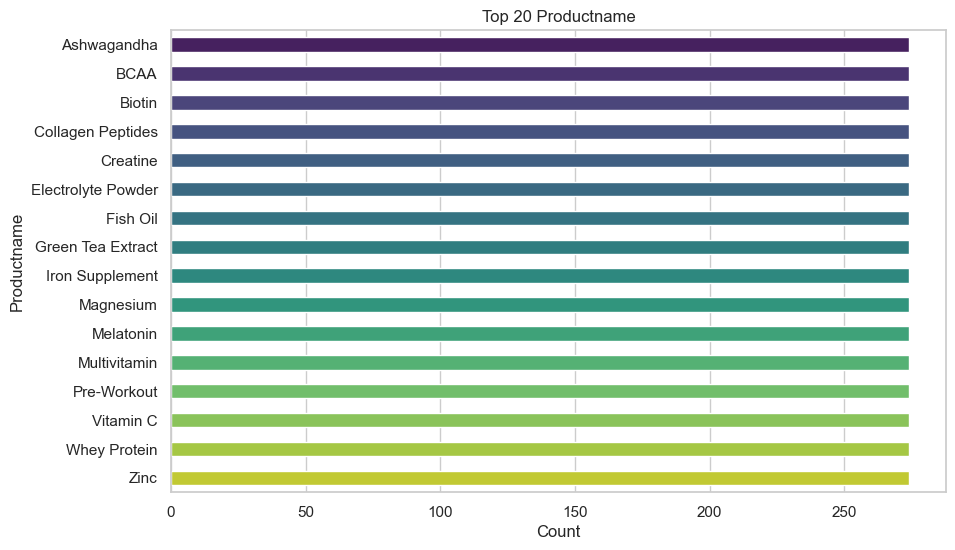

C:\Users\2401050\AppData\Local\Temp\ipykernel_56868\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


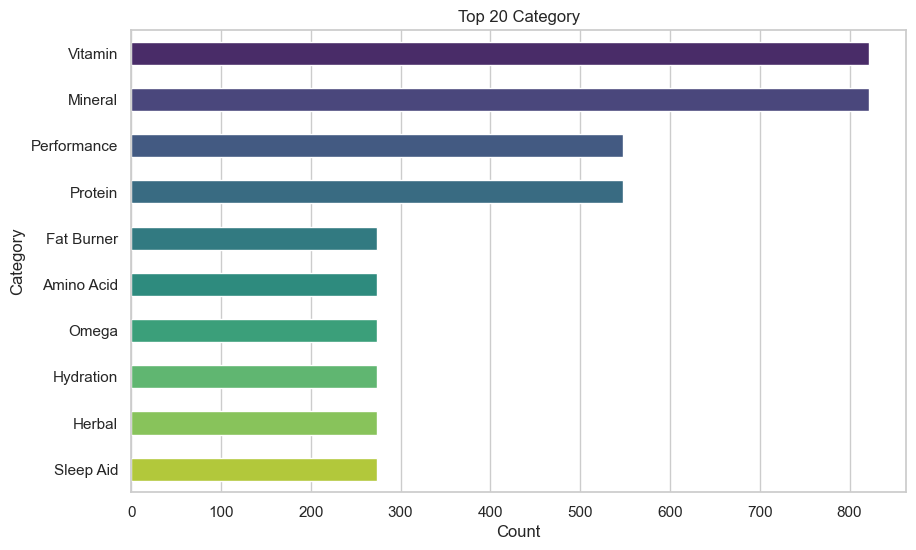

C:\Users\2401050\AppData\Local\Temp\ipykernel_56868\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


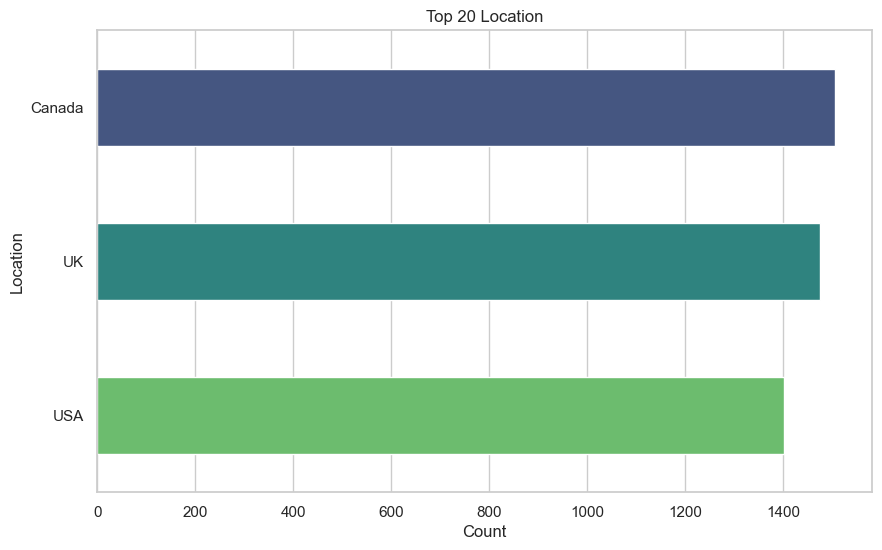

C:\Users\2401050\AppData\Local\Temp\ipykernel_56868\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


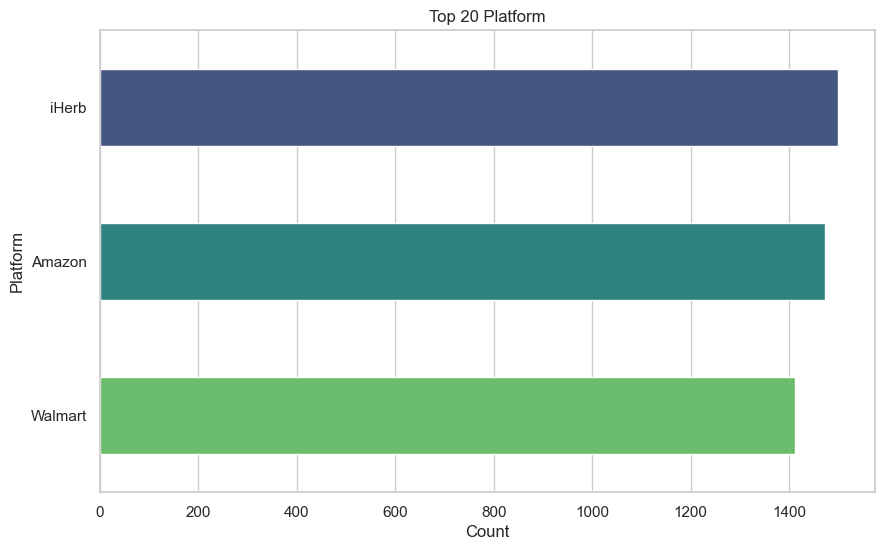

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

def plot_top_n_categories(df, column, n=10, bar_width=0.5):
    plt.figure(figsize=(10, 6))
    top_n = df[column].value_counts().sort_values(ascending=False).head(n)
    
    sns.barplot(
        x=top_n.values,
        y=top_n.index,
        palette="viridis",          # 可換其他 palette
        width=bar_width,
        order=top_n.index          
    )
    
    plt.title(f'Top {n} {column.title()}')
    plt.xlabel('Count')
    plt.ylabel(column.title())
    plt.show()

# 自動抓分類欄位
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 畫圖
N = 20
for column in categorical_columns:
    plot_top_n_categories(df, column, N)


### ・"Quantity" and all categorical features

Next, it is the relationship for all the categorical features to "quantity" using box plot. Based on frequency, 20 groups for each featutre will be presented to know the overall trend.

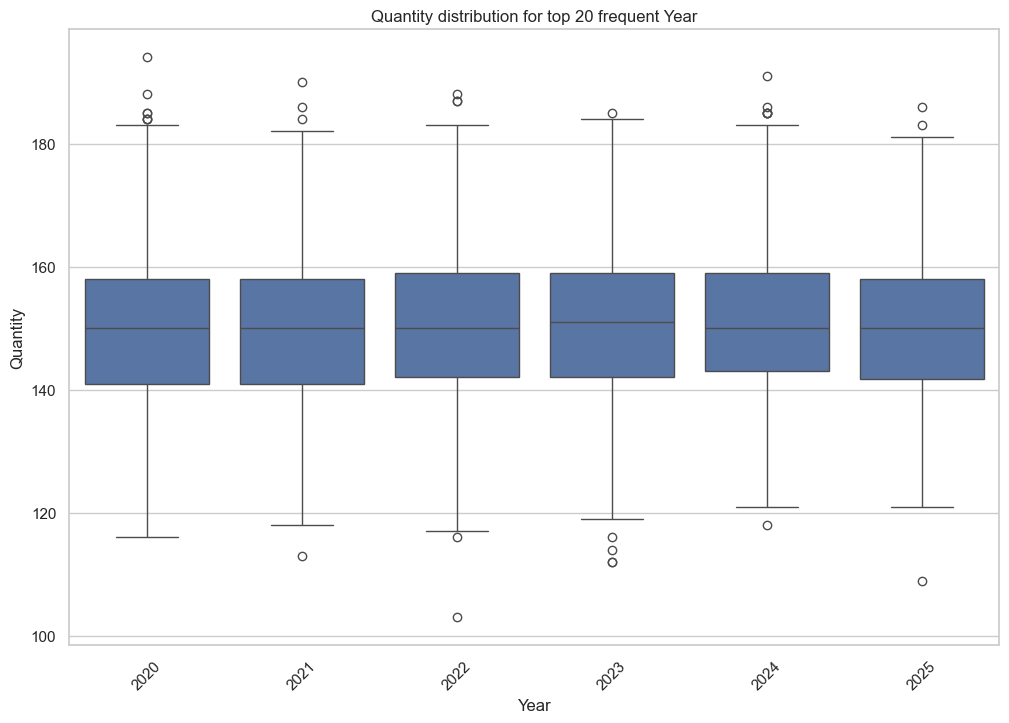

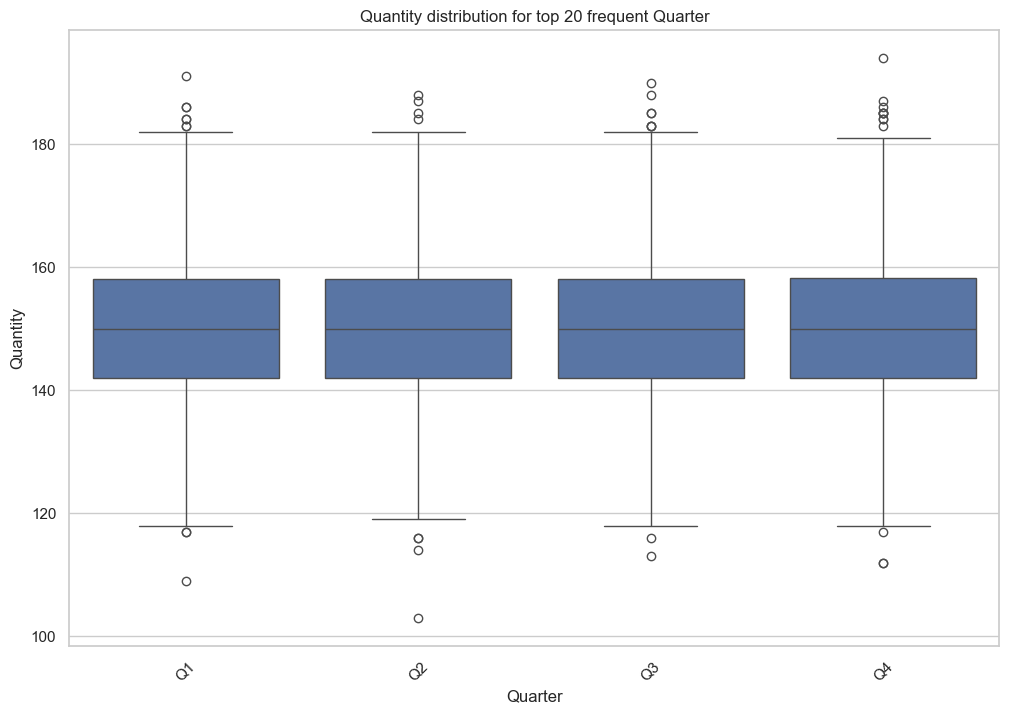

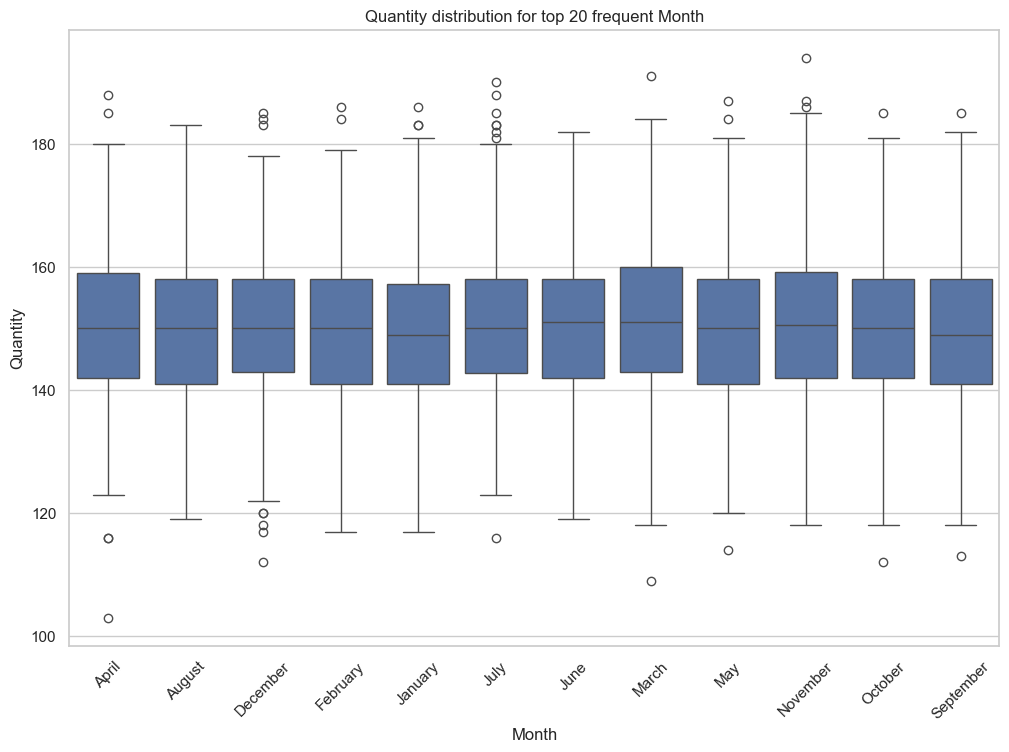

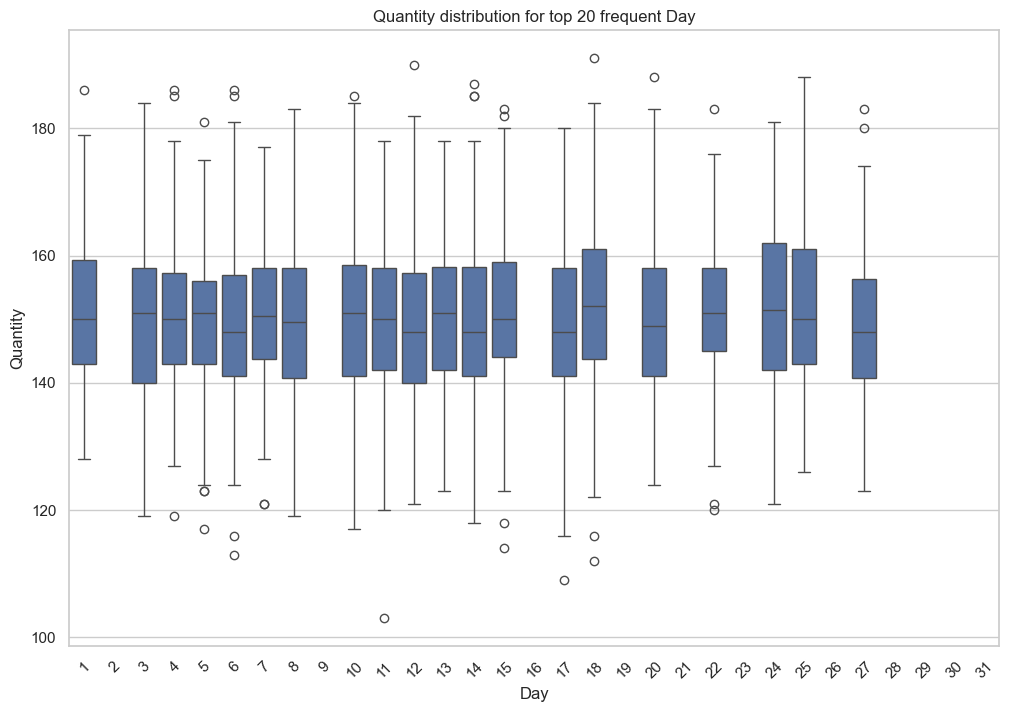

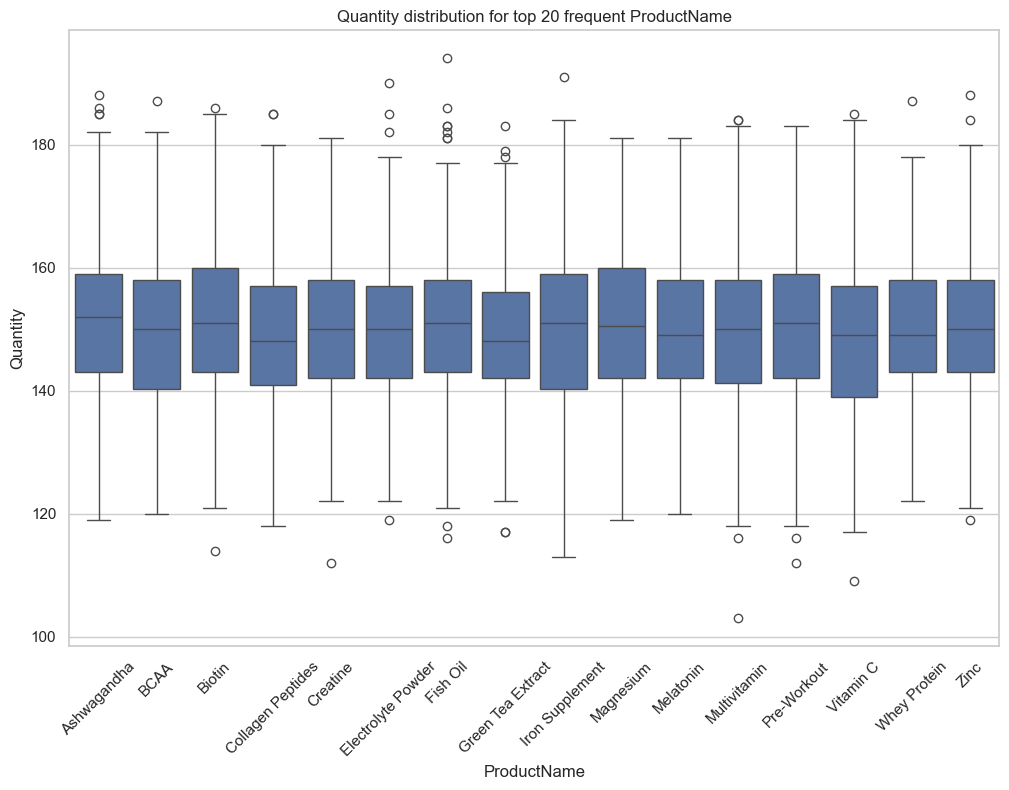

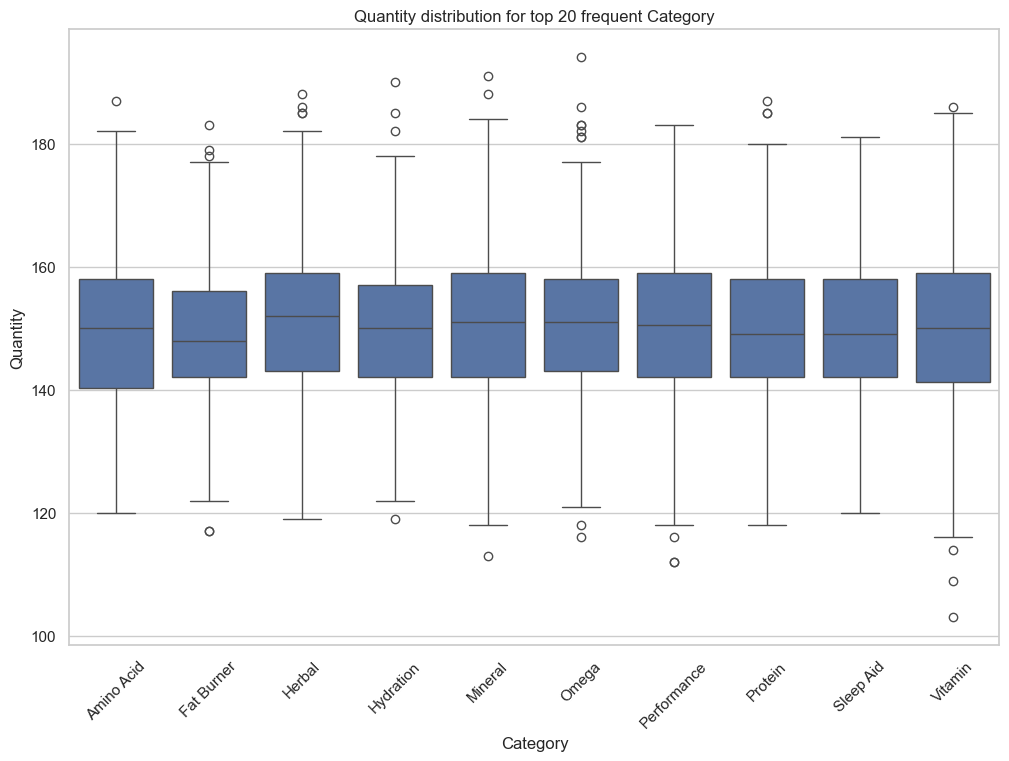

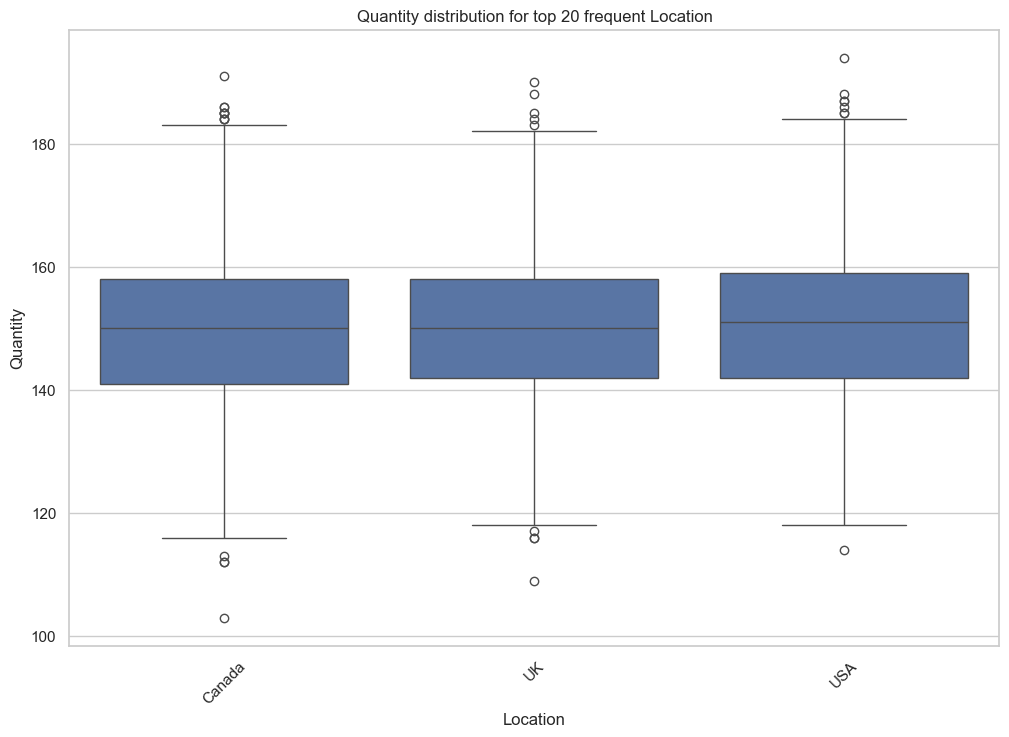

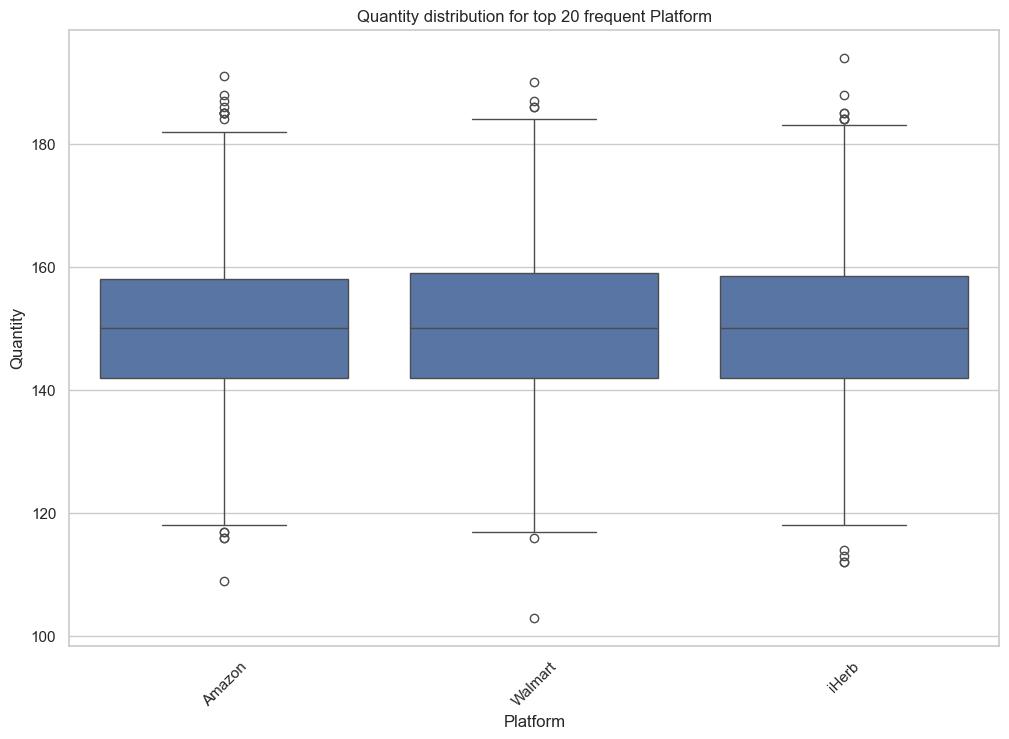

In [194]:
# List of categorical columns to analyze

for col in categorical_columns:
    # Find the top 20 categories in each column based on frequency
    top_20_categories = df[col].value_counts().head(20).index
    
    # Filter the DataFrame to only include rows where the category is in the top 20 for the current column
    filtered_df = df[df[col].isin(top_20_categories)]
    
    # Plotting
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=col, y='Quantity', data=filtered_df)
    plt.title(f'Quantity distribution for top 20 frequent {col}')
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.show()


# 4. Data Cleaning

Data cleaning is a critical step in the machine learning pipeline. The steps of data cleaning are as below:

 1. Missing value imputation
 2. Removing outliers

# ・Missing Values Imputation

In missing value imputation, for distinct columns within the dataset, tailored strategies for imputing missing values are essential, considering the unique characteristics of each column. Here's a refined approach based on the column types:

1. "ShippingCost": Given that their distributions lean towards the right, indicating a skewness, median method will be applied for imputation to prevent the overall structure from being affected by the extreme values. 

2. "WarehouseLocation": This column lacks detailed descriptive information that could guide a straightforward imputation, poses a challenge. Here, employing a K-Nearest Neighbors (KNN) imputation strategy is suitable. KNN can find the most similar entries (nearest neighbors) based on other features within the dataset.

In [195]:
# Check the missing values and data types in the data frame
print(df.isnull().sum())
print(df.info()) 

Year             0
Quarter          0
Month            0
Day              0
ProductName      0
Category         0
Quantity         0
Price            0
Discount         0
UnitsReturned    0
Location         0
Platform         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Year           4384 non-null   category
 1   Quarter        4384 non-null   category
 2   Month          4384 non-null   category
 3   Day            4384 non-null   category
 4   ProductName    4384 non-null   category
 5   Category       4384 non-null   category
 6   Quantity       4384 non-null   int64   
 7   Price          4384 non-null   float64 
 8   Discount       4384 non-null   float64 
 9   UnitsReturned  4384 non-null   int64   
 10  Location       4384 non-null   category
 11  Platform       4384 non-null   category
dtypes: category(8), f

In [196]:
# Verify the changes by checking if there are any missing values left in 'variety'

df_cleaned = df
df_cleaned.isnull().sum()

Year             0
Quarter          0
Month            0
Day              0
ProductName      0
Category         0
Quantity         0
Price            0
Discount         0
UnitsReturned    0
Location         0
Platform         0
dtype: int64

# ・Remove Outliers

From the right-skewed distribution of "price", it is implied that some values are outliers from the rest of the data, so there is a need to delete them to ensure a more effective prediction.

Here the Interquartile Range (IQR) method is used for identifying and removing outliers, which is a common statistical approach.

In [197]:
# Calculate Q1, Q3, and IQR for 'UnitPrice'
Q1_Price = df_cleaned['Price'].quantile(0.25)
Q3_Price = df_cleaned['Price'].quantile(0.75)
IQR_Price = Q3_Price - Q1_Price

# Identify outliers for 'Price' based on the 1.5*IQR rule
outliers_Price_indices = df_cleaned[(df_cleaned['Price'] < (Q1_Price - 1.5 * IQR_Price)) | 
                                      (df_cleaned['Price'] > (Q3_Price + 1.5 * IQR_Price))].index

print(outliers_Price_indices)

# Remove 'Price' outliers
#df_cleaned = df_cleaned.drop(outliers_Price_indices)

# For 'score', instead of automatic removal, perform a review or adjustment
# Calculate Q1, Q3, and IQR for 'score'
#Q1_score = df_cleaned['score'].quantile(0.25)
#Q3_score = df_cleaned['score'].quantile(0.75)
#IQR_score = Q3_score - Q1_score

# Identify potential outliers for 'score'
#potential_outliers_score = df_cleaned[(df_cleaned['score'] < (Q1_score - 1.5 * IQR_score)) | 
#                                       (df_cleaned['score'] > (Q3_score + 1.5 * IQR_score))]


Index([], dtype='int64')


### Comment:
Here it is proved that removing outliers from "quantity" will lead to a fall in the performance of the models, so the best strategy is to only remove the outliers from "price" for numerical features.

In [198]:
#Verify the result by checking missing values
df_cleaned.isnull().sum()

Year             0
Quarter          0
Month            0
Day              0
ProductName      0
Category         0
Quantity         0
Price            0
Discount         0
UnitsReturned    0
Location         0
Platform         0
dtype: int64

In [199]:
df_cleaned.corr(numeric_only=True)['Quantity'].sort_values(ascending=False)

Quantity         1.000000
UnitsReturned    0.116523
Price            0.013749
Discount        -0.010435
Name: Quantity, dtype: float64

In [200]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Year           4384 non-null   category
 1   Quarter        4384 non-null   category
 2   Month          4384 non-null   category
 3   Day            4384 non-null   category
 4   ProductName    4384 non-null   category
 5   Category       4384 non-null   category
 6   Quantity       4384 non-null   int64   
 7   Price          4384 non-null   float64 
 8   Discount       4384 non-null   float64 
 9   UnitsReturned  4384 non-null   int64   
 10  Location       4384 non-null   category
 11  Platform       4384 non-null   category
dtypes: category(8), float64(2), int64(2)
memory usage: 174.8 KB


### Comment:
The rise of correlation coefficient proves that removing outliers indeed eliminates some noise in their relationship.

In [201]:
# # Verify the changes by checking the shape of distributions

# # Set the style of seaborn
# sns.set(style="whitegrid")

# # Numerical columns: 'score' and 'price'
# fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# # Histograms for score and price
# sns.histplot(wine_cleaned['score'].dropna(), bins=20, kde=True, ax=ax[0])
# ax[0].set_title('Score Distribution')

# sns.histplot(wine_cleaned['price'].dropna(), bins=20, kde=True, ax=ax[1])
# ax[1].set_title('Price Distribution')

# plt.show()


### Comment:
After addressing missing values and removing outliers, the underlying trends within the two crucial numerical datasets—"score" and "price"—can be more accurately represented, devoid of noise. This refinement enhances the quality of predictive analysis by ensuring that the data more reliably reflects genuine patterns, thereby facilitating more trustworthy predictions.

# 5. Feature Engineering

In this step, there will be several elements being done to enhance the quality of the dataset for prediction.

1. "year" Imputation: Feature "year" will be extracted from "title" and processed as a cleaned numerical feature.
2. Removing Irrelevant Features
3. Grouping Data

### ・ "year" Imputation

Considering the impact of vintage on wine quality, the year of production may be a critical attribute that can significantly influence a wine's score. Therefore, the 'year' will be extracted from the 'title' and placed into a new column.

Given the structured nature of the 'title' field, where the 'year' of production typically follows the 'winery' name and is not positioned at the beginning of the string, the extraction process must account for this pattern to accurately identify the 'year'. Thus, the approach will involve selecting sequences of four digits that do not commence the title but instead follow some text, ensuring that the extracted numbers genuinely represent the production year in alignment with the data frame's characteristics.

In [202]:
# import re

# # Define a function to extract the year from the title
# def extract_year(title):
#     # Find all four-digit numbers between 1000 and 2024 that are not at the beginning of the string
#     matches = re.findall(r'(?<!^)\b(1\d{3}|200\d|201\d|202[0-4])\b', title)
#     if matches:
#         # Return the first match (not at the beginning)
#         return matches[0]
#     else:
#         # If no matches are found, or the match is at the beginning, return None
#         return None

# # Apply the function and create a new column for the extracted year
# wine_cleaned['year'] = wine_cleaned['title'].apply(extract_year)

# # Display the result
# print(wine_cleaned.head())



In [203]:
# # Examine missing values resulted from the last step
# wine_cleaned.isnull().sum()

### Comment:
To address missing values in the 'year' column, the optimal strategy is to impute these gaps with the 'median' value. This approach is preferred over using the 'mean' because it guarantees that the structure of "year" will remain stable, not to be affected by outliers.

In [204]:
# # Convert the 'year' column to numeric, and invalid parsing will be set as NaN
# wine_cleaned['year'] = pd.to_numeric(wine_cleaned['year'], errors='coerce')

# # Calculate the median of the 'year' column, excluding NaN values
# year_median = wine_cleaned['year'].median()

# # Impute missing values in 'year' with the median
# wine_cleaned['year'].fillna(year_median, inplace=True)

# # Display the result to verify the imputation
# print(wine_cleaned)

In [205]:
# # Convert 'year' column to integer
# wine_cleaned['year'] = wine_cleaned['year'].astype(int)

In [206]:
# # Verify the change of the data type
# wine_cleaned.describe()

In [207]:
# # Verify the result of the imputation 
# wine_cleaned.isnull().sum()

In [208]:
# import seaborn as sns

# # Histogram of 'year'
# sns.histplot(wine_cleaned['year'].dropna(), bins=20, kde=True, color='blue')
# plt.title('Distribution of Year in Wine Data')
# plt.xlabel('Year')
# plt.ylabel('Frequency')
# plt.show()

# # Box Plot of 'year'
# sns.boxplot(x=wine_cleaned['year'])
# plt.title('Year Distribution in Wine Data')
# plt.xlabel('Wine Year')
# plt.show()

In [209]:
# # Examine the correlation coefficient of 'year' to 'score'
# correlation_coefficient_year_score = wine_cleaned['year'].corr(wine_cleaned['score'])
# correlation_coefficient_year_score

### Comment:
From the above distribution of "year", it is clear that there are considerable noises in "year". Concerning the significant relationship for "year" to "score", removing outliers is indicated as an important step here. 

In [210]:
# import pandas as pd

# # Assuming 'wine_cleaned' is your DataFrame and 'year' is the column of interest
# Q1 = wine_cleaned['year'].quantile(0.25)
# Q3 = wine_cleaned['year'].quantile(0.75)
# IQR = Q3 - Q1

# # Defining outliers as those beyond 1.5 times the IQR from the Q1 or Q3
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filtering out the outliers
# wine_cleaned = wine_cleaned[(wine_cleaned['year'] >= lower_bound) & (wine_cleaned['year'] <= upper_bound)]


Visualize the distribution and box plot of the "year" column without outliers.

In [211]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Histogram of 'year' without outliers
# plt.figure(figsize=(6, 4))
# sns.histplot(wine_cleaned['year'], bins=20, kde=True)
# plt.title('Distribution of Year in Wine Data (No Outliers)')
# plt.xlabel('Year')
# plt.ylabel('Frequency')
# plt.show()

# # Box plot of 'year' without outliers
# plt.figure(figsize=(8, 4))
# sns.boxplot(x=wine_cleaned['year'])
# plt.title('Box Plot of Year in Wine Data (No Outliers)')
# plt.xlabel('Year')
# plt.show()


Compute the correlation coefficient between "year" and "score" without outliers

In [212]:
# correlation_coefficient = wine_cleaned['year'].corr(wine_cleaned['score'])
# print(f"Correlation Coefficient between Year and Score (No Outliers): {correlation_coefficient}")

### Comment:
The result that the rise of correlation coefficient of "year" from 0.11 to 0.188 varifies the meaningfulness of removing outliers, and this can be an important feature to support the model prediction.  

### ・Drop Irrelevant Values

In this dataset, "id" and "target" are two irrelevant columns to the prediction, so it is a need to delect them in avoiding noise.

In [213]:
# # Dropping the 'id' and 'title'columns from the 'wine_cleaned' DataFrame
# wine_cleaned = wine_cleaned.drop(columns=['id','title'])
# wine_cleaned.isnull().sum()

### ・Group values

Grouping values that are appearing at rather low frequency in categorical variables such as "region_1", "variety" and "winery" in a dataset can significantly simplify the complexity to avoid the curse of dimensionality, so that the models will not struggle to learn efficiently.

Noticeably, the low-frequency values in the feature "state" will not be grouped, because the number of the types in "state" is only around 30 and the box plot part in EDA presents the considerable relationship of "state" with "score".

In [214]:
# Display the DataFrame
print(df_cleaned.nunique())
# print(df_cleaned['variety'].nunique())
# print(df_cleaned['winery'].nunique())

Year                6
Quarter             4
Month              12
Day                31
ProductName        16
Category           10
Quantity           81
Price            2919
Discount           26
UnitsReturned       9
Location            3
Platform            3
dtype: int64


In [215]:
#df_cleaned = df_cleaned.drop(columns=['WeekNo'])

In [216]:
# import pandas as pd

# # Replaces categories in a specified column of the DataFrame,  
# # which have fewer than a specified number of occurrences with a new category label
# def replace_infrequent_categories(data, column_name, threshold=5, new_value_suffix='others'):
#     """
#     Parameters:
#     - data: pandas.DataFrame containing the data.
#     - column_name: str, the name of the column to process.
#     - threshold: int, the minimum number of occurrences required to keep the category (default 5).
#     - new_value_suffix: str, suffix for the new category label for infrequent categories.

#     Returns:
#     - None, modifies the DataFrame in place.
#     """
#     counts = data[column_name].value_counts()
#     less_than_threshold = counts[counts < threshold].index
#     new_value = f"{column_name}_{new_value_suffix}"
#     data[column_name] = data[column_name].apply(lambda x: new_value if x in less_than_threshold else x)

# # Replace infrequent categories
# replace_infrequent_categories(wine_cleaned, 'region_1')
# replace_infrequent_categories(wine_cleaned, 'variety')
# replace_infrequent_categories(wine_cleaned, 'winery')

# # Display the modified DataFrame unique counts for validation
# print(f"Unique 'region_1': {wine_cleaned['region_1'].nunique()}")
# print(f"Unique 'variety': {wine_cleaned['variety'].nunique()}")
# print(f"Unique 'winery': {wine_cleaned['winery'].nunique()}")


In [217]:
# region_1_counts = wine_cleaned['region_1'].value_counts()
# region_1_others_count = region_1_counts['region_1_others']

# variety_counts = wine_cleaned['variety'].value_counts()
# variety_others_count = variety_counts['variety_others']

# winery_counts = wine_cleaned['winery'].value_counts()
# winery_others_count = winery_counts['winery_others']

# print("Number of region_1_others:", region_1_others_count)
# print("Number of variety_others:", variety_others_count)
# print("Number of winery_others:", winery_others_count)

# 6. Feature Selection

For feature selection, both numerical and categorical data will be put together using Random Forest Regressor. 

### ・Random Forest Regressor for Feature Selection

The Random Forest Regressor evaluates the contribution of each feature to the prediction accuracy across all trees, thereby identifying the most significant features. This method is particularly beneficial as it naturally handles categorical variables, without the need for extensive preprocessing or dummy variable creation.

### The reason to choose Random Forest Regressor to do feature selection but not PCA
The Random Forest Regressor offers several advantages over Principal Component Analysis (PCA) when it comes to feature selection and handling categorical data, particularly in predictive modeling tasks:

1. Non-Linear Relationships: Random Forest can capture non-linear relationships between features and the target variable, but PCA operates under the assumption that the data's primary structure is linear, potentially leading to the neglect of noise and outlier effects. This makes Random Forest more versatile in dealing with complex data structures.

2. Categorical Data Handling: Random Forest can naturally handle categorical variables without the need for converting them into numerical values through one-hot encoding or similar preprocessing steps. PCA, on the other hand, generally requires numerical inputs, and the process of encoding can lead to a high-dimensional dataset if the categorical variables have many levels.

3. Feature Importance: Random Forest provides direct insights into feature importance based on how each feature improves the model's performance. This is crucial for feature selection, as it allows for the identification of the most significant features. PCA transforms the original features into principal components based on variance, which may not always align with the predictive relevance of the features.

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Define your categorical columns
categorical_columns = [col for col in categorical_columns if col != 'WeekNo']
#  # Specify your categorical columns

# Define the encoder and the transformation
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')

# Separate features and target
X = df_cleaned.drop('Quantity', axis=1)
y = df_cleaned['Quantity']

# Encode the features
X_encoded = column_transformer.fit_transform(X)
feature_names_encoded = column_transformer.get_feature_names_out()

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_

# Combine feature names and their importances, sort them, and select the top 15
features_importances = sorted(zip(feature_names_encoded, importances), key=lambda x: x[1], reverse=True)[:15]

# Extract just the feature names for the top 15
top_features = [feature for feature, importance in features_importances]

# Print the top 15 features
print("Top 15 Features based on Importance:")
for feature in top_features:
    print(feature)


Top 15 Features based on Importance:
remainder__Price
remainder__Discount
remainder__UnitsReturned
encoder__Location_UK
encoder__Location_Canada
encoder__Platform_Amazon
encoder__Platform_Walmart
encoder__Location_USA
encoder__Year_2020
encoder__Year_2023
encoder__Year_2022
encoder__Platform_iHerb
encoder__Year_2024
encoder__Year_2021
encoder__Day_12


### Comment:
When selecting 20 features, it is implied by the learning curve that the final model suffers overfitting, but choosing 10 features will lower R-squared significantly arond 10 percent. Therefore, by experimentation, 15 features can be a good selection to meet the blance between shrinking overfitting and raising R-squared.

In [219]:
top_features

['remainder__Price',
 'remainder__Discount',
 'remainder__UnitsReturned',
 'encoder__Location_UK',
 'encoder__Location_Canada',
 'encoder__Platform_Amazon',
 'encoder__Platform_Walmart',
 'encoder__Location_USA',
 'encoder__Year_2020',
 'encoder__Year_2023',
 'encoder__Year_2022',
 'encoder__Platform_iHerb',
 'encoder__Year_2024',
 'encoder__Year_2021',
 'encoder__Day_12']

In [220]:
# Trim the first word and underscores
feature_selected = ['__'.join(feature.split('__')[1:]) for feature in top_features]

# Print the trimmed feature names
print("Trimmed Features:")
for feature in feature_selected:
    print(feature)

Trimmed Features:
Price
Discount
UnitsReturned
Location_UK
Location_Canada
Platform_Amazon
Platform_Walmart
Location_USA
Year_2020
Year_2023
Year_2022
Platform_iHerb
Year_2024
Year_2021
Day_12


# 7. Encoding Categorical Variables

This function will automatically handle columns as "state", "region_1", "region_2", "winery", and "variety" and leave all other numerical columns unchanged.

The decision against using label encoding stems from the absence of any ordinal relationship among the values within these features. For one-hot encoding, it avoids imposing an artificial order on the data and ensures that the modeling process more accurately reflects the underlying relationships between features and the target variable "score".

### ・One-Hot Encoding

In [221]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Year           4384 non-null   category
 1   Quarter        4384 non-null   category
 2   Month          4384 non-null   category
 3   Day            4384 non-null   category
 4   ProductName    4384 non-null   category
 5   Category       4384 non-null   category
 6   Quantity       4384 non-null   int64   
 7   Price          4384 non-null   float64 
 8   Discount       4384 non-null   float64 
 9   UnitsReturned  4384 non-null   int64   
 10  Location       4384 non-null   category
 11  Platform       4384 non-null   category
dtypes: category(8), float64(2), int64(2)
memory usage: 174.8 KB


In [222]:
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical columns in 'df_cleaned'
categorical_cols = df_cleaned.select_dtypes(include=['category']).columns.tolist()


# Initializing the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop=None)  # `drop='first'` to avoid dummy variable trap

# Fitting and transforming the categorical columns
# Note: `.fit_transform()` expects a 2D array, hence the double brackets `[[column]]`
encoded_data = ohe.fit_transform(df_cleaned[categorical_cols])

# Creating a DataFrame with the encoded data
# `get_feature_names_out()` gives new column names
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_cols))



# Concatenating the encoded_df with the original DataFrame (minus the categorical columns)
df_cleaned_numeric = df_cleaned.drop(columns=categorical_cols)
df_encoded = pd.concat([df_cleaned_numeric.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Display the first few rows to verify
print(df_encoded.head())


   Quantity  Price  Discount  UnitsReturned  Year_2020  Year_2021  Year_2022  \
0       143  31.98      0.03              2        1.0        0.0        0.0   
1       139  42.51      0.04              0        1.0        0.0        0.0   
2       161  12.91      0.25              0        1.0        0.0        0.0   
3       140  16.07      0.08              0        1.0        0.0        0.0   
4       157  35.47      0.25              3        1.0        0.0        0.0   

   Year_2023  Year_2024  Year_2025  ...  Category_Performance  \
0        0.0        0.0        0.0  ...                   0.0   
1        0.0        0.0        0.0  ...                   0.0   
2        0.0        0.0        0.0  ...                   0.0   
3        0.0        0.0        0.0  ...                   0.0   
4        0.0        0.0        0.0  ...                   1.0   

   Category_Protein  Category_Sleep Aid  Category_Vitamin  Location_Canada  \
0               1.0                 0.0           

In [223]:
# Verify the result
# 額外：若只想看欄位名稱清單
print("\nAll column names:")
print(df_encoded.columns.tolist())



All column names:
['Quantity', 'Price', 'Discount', 'UnitsReturned', 'Year_2020', 'Year_2021', 'Year_2022', 'Year_2023', 'Year_2024', 'Year_2025', 'Quarter_Q1', 'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4', 'Month_April', 'Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8', 'Day_9', 'Day_10', 'Day_11', 'Day_12', 'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19', 'Day_20', 'Day_21', 'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28', 'Day_29', 'Day_30', 'Day_31', 'ProductName_Ashwagandha', 'ProductName_BCAA', 'ProductName_Biotin', 'ProductName_Collagen Peptides', 'ProductName_Creatine', 'ProductName_Electrolyte Powder', 'ProductName_Fish Oil', 'ProductName_Green Tea Extract', 'ProductName_Iron Supplement', 'ProductName_Magnesium', 'ProductName_Melatonin', 'Pr

In [224]:
df_encoded

,Quantity,Price,Discount,UnitsReturned,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Year_2025,...,Category_Performance,Category_Protein,Category_Sleep Aid,Category_Vitamin,Location_Canada,Location_UK,Location_USA,Platform_Amazon,Platform_Walmart,Platform_iHerb
0,143,31.98,0.03,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,139,42.51,0.04,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,161,12.91,0.25,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,140,16.07,0.08,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,157,35.47,0.25,3,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,160,47.79,0.21,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4380,154,38.12,0.22,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4381,139,20.40,0.12,3,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4382,154,18.31,0.23,2,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [225]:
# Check the types of data
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Quantity                        4384 non-null   int64  
 1   Price                           4384 non-null   float64
 2   Discount                        4384 non-null   float64
 3   UnitsReturned                   4384 non-null   int64  
 4   Year_2020                       4384 non-null   float64
 5   Year_2021                       4384 non-null   float64
 6   Year_2022                       4384 non-null   float64
 7   Year_2023                       4384 non-null   float64
 8   Year_2024                       4384 non-null   float64
 9   Year_2025                       4384 non-null   float64
 10  Quarter_Q1                      4384 non-null   float64
 11  Quarter_Q2                      4384 non-null   float64
 12  Quarter_Q3                      43

### ・Create "df_selected" data frame

Turn the result from one-hot encoding to a new data frame "wine_selected" which contains only the selected features to undergo model training.

In [226]:
# Include 'quantity' in the data frame
df_selected = df_encoded[feature_selected]
df_selected['Quantity'] = df_encoded['Quantity']
df_selected.head()

C:\Users\2401050\AppData\Local\Temp\ipykernel_56868\2709672253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Quantity'] = df_encoded['Quantity']


,Price,Discount,UnitsReturned,Location_UK,Location_Canada,Platform_Amazon,Platform_Walmart,Location_USA,Year_2020,Year_2023,Year_2022,Platform_iHerb,Year_2024,Year_2021,Day_12,Quantity
0,31.98,0.03,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,143
1,42.51,0.04,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,139
2,12.91,0.25,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,161
3,16.07,0.08,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,140
4,35.47,0.25,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,157


In [227]:
# Examine the data frame by exporting it
df_selected.to_csv('df_selected.csv', index=False)

### ・Heat Map: examine the relationship of selected features

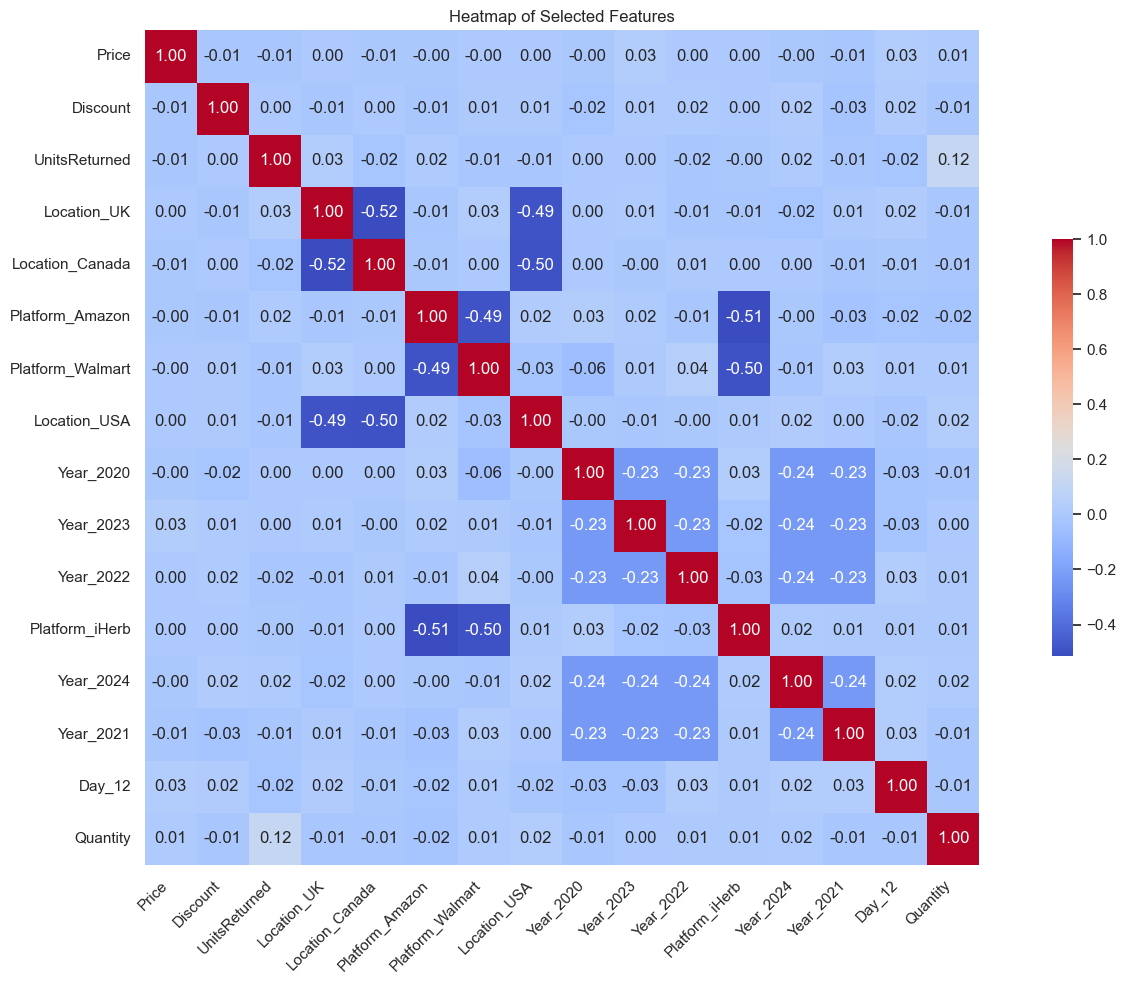

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Heatmap of Selected Features')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 8. Machine Learning Models

### ・Decision Tree

Using a Decision Tree model for predicting wine scores in the wine project offers several advantages, making it a compelling choice for this task. The three most important reasons to consider a Decision Tree include:

1. Interpretability: Decision Trees provide clear visualization and understanding of how decisions are made, making it easier for stakeholders to follow the logic behind each prediction.

2. Handles Non-linear Relationships: Decision Trees are non-parametric, meaning they do not assume any underlying relationship between features and the target variable. This capability allows them to capture non-linear relationships between the characteristics of wine and its score.

3. Feature Importance: Decision Trees naturally provide insights into which features are most influential in predicting the score. This information can be crucial for winemakers and marketers to understand which aspects as "variety", "region", and "winery") most significantly impact its quality assessment, guiding strategic decisions in production and marketing.

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_selected.drop('Quantity', axis=1)
y = df_selected['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 323.2976054732041
Root Mean Squared Error (RMSE): 17.9804784550691
R-squared (R²): -1.0334137989535104


### ・Ensemble

To refine the random forest model, the ensemble method will be used here, including bagging, boosting, and stacking.

1. Bagging: Random Forest Model
2. Boosting: Gradient Boosting Model
3. Stacking: Combination of Random Forest and Gradient Boosting Models

Overall outcome of the usage of Ensemble methods:
1. Improved Accuracy: It leads to better predictive performance than any single model.
2. Reduced Overfitting: Techniques like bagging and boosting can mitigate overfitting by averaging multiple models' predictions or by sequentially correcting for overfit to the training data.
3. Handling Variance and Bias: Ensemble methods can balance the trade-off between bias and variance, reducing errors associated with each.

### 1. Bagging: Random Forest Model

Random Forest is an ensemble learning method, Bagging.

By applying bagging to refine Decision Tree Model into a Random Forest, the power of multiple trees will be leveraged to create a more robust model that addresses the key limitations of a single decision tree, such as overfitting and high variance. 

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_selected.drop('Quantity', axis=1)
y = df_selected['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
RF_r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {RF_r2}")

Mean Squared Error (MSE): 174.84345404789056
Root Mean Squared Error (RMSE): 13.222838350667779
R-squared (R²): -0.09969602650565235


### 2. Boosting: Gradient Boosting Machines (GBM)

Boosting is a sequential ensemble technique that combines multiple weak learners to form a strong learner, aiming to improve the accuracy and performance of the model. Unlike bagging methods like Random Forest, which train multiple models in parallel and combine their predictions, boosting focuses on training models sequentially, with each model learning from the mistakes of its predecessors.

Boosting can significantly improve the performance of Decision Trees and Random Forest models by focusing on reducing both bias and variance through its iterative correction process. It makes these models more adaptable to complex datasets with intricate patterns, leading to more accurate and robust predictive models. 

However, the success of boosting methods depends on careful tuning of their parameters, including the learning rate and the number of iterations, to prevent overfitting and ensure optimal performance.

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_selected.drop('Quantity', axis=1)
y = df_selected['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
GB_r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {GB_r2}")

Mean Squared Error (MSE): 161.9313208113012
Root Mean Squared Error (RMSE): 12.725223802012332
R-squared (R²): -0.018483826190165864


### 3. Stacking: combine random forest and GBM models

Stacking models, involves combining multiple predictive models to improve the accuracy of predictions. 

The main advantage of this technique is that it leverages the strengths of multiple models to achieve better performance than any single model could on its own. This is particularly useful in reducing bias and variance, leading to more robust and reliable predictions.

Here Random Forest Model and GBM Model will be combined as the Stacking Model, in order to raise the performance of the prediction.

In [232]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base models (Random Forest and Gradient Boosting)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Generate predictions from base models
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Combine predictions as input to meta-model
meta_features = np.column_stack((rf_predictions, gb_predictions, X_test))

# Initialize and train the meta-model (e.g., Linear Regression)
meta_model = LinearRegression()
meta_model.fit(meta_features, y_test)

# Make final predictions using meta-model
final_predictions = meta_model.predict(meta_features)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, final_predictions)
print("MSE:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared (R²)
stacking_r2 = r2_score(y_test, final_predictions)
print("R-squared:", stacking_r2)



MSE: 155.7574279992625
RMSE: 12.480281567306985
R-squared: 0.020347512566223358


Here is the bar chart containing all R-squared from the Ensemble Models above. 

C:\Users\2401050\AppData\Local\Temp\ipykernel_56868\1053138155.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared Score', data=data, palette='Blues')


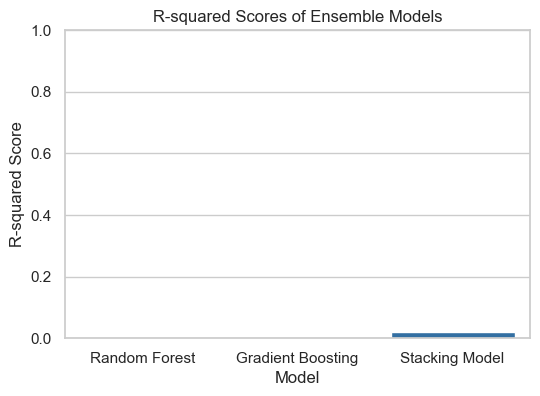

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming RF_r2, GB_r2, and stacking_r2 are your R-squared scores
# Replace these with the actual scores
r2_scores = [RF_r2, GB_r2, stacking_r2]  
models = ['Random Forest', 'Gradient Boosting', 'Stacking Model']

# Convert to DataFrame for seaborn
data = pd.DataFrame({
    'Model': models,
    'R-squared Score': r2_scores
})

# Create the bar chart using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='R-squared Score', data=data, palette='Blues')

plt.title('R-squared Scores of Ensemble Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim([0, 1])
plt.show()


From this form it is known that the R-squared of the stacking model is the most preferred. However, concerning model selection, Cross-Validation should be utilized to examined further.

# 9. Model Selection

### ・ K-Fold Cross-Validation

Cross-validation is a statistical method used to estimate the skill of machine learning models, primarily used to assess how the results of a statistical analysis will generalize to an independent data set. 

Here there will be 3 models to assess using K-Fold Cross Validation:

1. Random Forest Model
2. Gradient Boosting Machines Model
3. Stacking Model

### Random Forest Cross Validation

In [234]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values
cv_scores = -cv_scores

# Calculate Mean and Standard Deviation of MSE scores
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print("Cross-Validation MSE Scores:", cv_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)


Cross-Validation MSE Scores: [168.83449852 158.64598689 167.08330285 164.66397229 163.41245479]
Mean MSE: 164.52804306836816
Standard Deviation MSE: 3.491031651579778


### GBM Model Cross Validation

In [235]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Assuming X and y are your features and target variable, respectively
# Initialize the Gradient Boosting Regressor model
gbm_model = GradientBoostingRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gbm_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values
cv_scores = -cv_scores

# Calculate Mean and Standard Deviation of MSE scores
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print("Cross-Validation MSE Scores:", cv_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)


Cross-Validation MSE Scores: [158.80181692 150.88070997 158.90694648 154.80601031 155.45621725]
Mean MSE: 155.77034018572186
Standard Deviation MSE: 2.965307378371235


### Stacking Model Cross Validation

In [236]:
from sklearn.model_selection import cross_val_score

# Initialize and train the base models (Random Forest and Gradient Boosting)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
rf_model.fit(X, y)
gb_model.fit(X, y)

# Generate predictions from base models
rf_predictions = rf_model.predict(X)
gb_predictions = gb_model.predict(X)

# Combine predictions as input to meta-model
meta_features = np.column_stack((rf_predictions, gb_predictions, X))

# Initialize the meta-model (Linear Regression)
meta_model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(meta_model, meta_features, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values
cv_scores = -cv_scores

# Calculate Mean and Standard Deviation of MSE scores
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print("Cross-Validation MSE Scores:", cv_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)


Cross-Validation MSE Scores: [6.03548756 6.24703494 7.43252634 6.18969028 6.56024622]
Mean MSE: 6.492997066497156
Standard Deviation MSE: 0.4998089707667945


When choosing a model, all these metrics should be considered together. A model with lower Mean MSE and smaller Standard Deviation MSE is generally preferred. Therefore, according to the result, the Stacking Model is chosen.

# 10. Grid Search

### ・Stacking Model Grid Search
Grid Search is used to optimize hyperparameters for the stacked model to find the setup that yields the best model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

# Separate features (X) and target variable (y)
X = df_selected.drop(columns=['Quantity'])  # Features (excluding the target variable 'score')
y = df_selected['Quantity']  # Target variable

# Define the parameter grid for the meta-model (Linear Regression)
param_grid = {'fit_intercept': [True, False]}  # Example parameters, adjust as needed

# Initialize the meta-model (Linear Regression)
meta_model = LinearRegression()

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(meta_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search to find the best parameters
grid_search.fit(meta_features, y)  # meta_features is the input to the meta-model from the stacked model

# Get the best parameters and best MSE score
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best MSE:", best_mse)


NameError: name 'wine_selected' is not defined

The best set-up found in this model is {'fit_intercept': False}, so this set-up will be applied in the refinement of the Stacking Model.

### ・Refinement of the Stacking Model from Grid Search

The result from Grid Search will be used to refine the Stacking Model of Random Forest and GBM models.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Set base_models containing two estimators: Random Forest and Gradient Boosting
base_models = [('RandomForest', rf_model), ('GradientBoosting', gb_model)]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(meta_features, y, test_size=0.2, random_state=42)

# Use the best parameters found during grid search
best_params = {'fit_intercept': False}  

# Initialize the meta-model (Linear Regression) with the best parameters
refined_meta_model = LinearRegression(**best_params)

# Initialize the stacked ensemble model with the refined meta-model
stacked_model_refined = StackingRegressor(estimators=base_models, final_estimator=refined_meta_model)

# Train the refined stacked ensemble model
stacked_model_refined.fit(X_train, y_train)

# Generate predictions on the test set
stacked_predictions_refined = stacked_model_refined.predict(X_test)

# Calculate MSE, RMSE, and R-squared for the refined stacked ensemble model
mse_stacked_refined = mean_squared_error(y_test, stacked_predictions_refined)
rmse_stacked_refined = np.sqrt(mse_stacked_refined)
r_squared_stacked_refined = r2_score(y_test, stacked_predictions_refined)

print("Refined Stacked Ensemble Model:")
print("Best Parameters:", best_params)
print("Best MSE:", best_mse)
print("MSE:", mse_stacked_refined)
print("RMSE:", rmse_stacked_refined)
print("R-squared:", r_squared_stacked_refined)


Refined Stacked Ensemble Model:
Best Parameters: {'fit_intercept': False}
Best MSE: 4.200288310334495
MSE: 3.4254233567191754
RMSE: 1.850789927765757
R-squared: 0.6405324718777934


After the refinment, it is clear that the MSE and RMSE are lowered, and the R-squared is raised, proving a better performance in this model. 

# 11. Learning Curve

To examine if the model is overfitting or underfitting, learning curve will be used here.

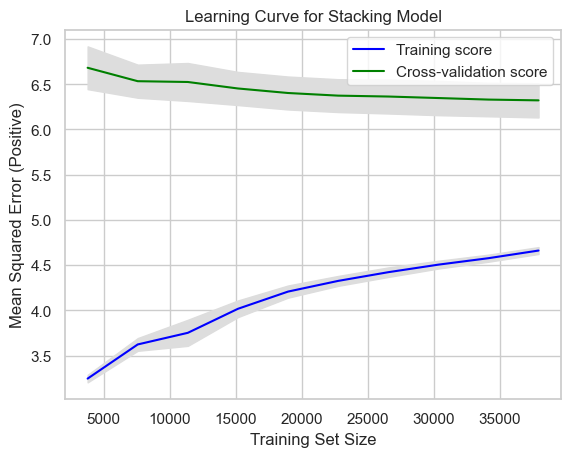

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Re-defining the stacked model as per the refined code provided
model1 = RandomForestRegressor(random_state=42)
model2 = GradientBoostingRegressor(random_state=42)
stacked_model = VotingRegressor(estimators=[('rf', model1), ('gb', model2)])

# Generating learning curve data with the scoring method updated to be positive
train_sizes, train_scores, test_scores = learning_curve(
    stacked_model, X, y, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'  # Using Negative MSE for demonstration, will convert to positive for visualization
)

# Calculate mean and standard deviation for training and test set scores, converting MSE to positive
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve with adjustments for positive values
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, label="Training score", color='blue')
plt.plot(train_sizes, test_mean, label="Cross-validation score", color='green')

plt.title("Learning Curve for Stacking Model")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (Positive)")
plt.legend(loc="best")
plt.show()


### Comment: 
According to the learning curve, some observations of this model can be pointed out:
1. The relatively low MSE, ranging from 3 to 5, also indicates a certain degree of success in the data processing steps.
2. The persistent, considerable gap between the training and validation scores suggests potential overfitting and shortcomings in the data processing steps.

The biggest usage of the learning curve:
From the learning curve, an overfitting issue can be examined any time to adjust the preprocessing steps. As in Feature Selection, although selecting more features improves the R-squared value in the stacking model, the learning curve tends to become more parallel. Thus, 15 features can be a proper choice for the balance between the reaching a better performace and reducing overfitting issue.

# 12. Pipeline

In this pipeline building, the data frame wine_cleaned will be used to simply present processes from the 4th step "Data Cleaning".
While the numerical columns as "score" and "price" in the data frame "wine_cleaned" have been imputed well by the median method previously, this pipeline keeps the imputation process in order to present complete data preprocessing steps.

Here Generative AI is used to build pipeline, and below is the link.

https://chat.openai.com/share/8a342064-e3a4-4732-8ccc-11283c45114f

In [ ]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
# Prepare the dataset to do pipeline
X = df_cleaned.drop('Quantity', axis=1)
y = df_cleaned['Quantity']

# Separate the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# # List of categorical and numeric columns
# categorical_cols = ['state', 'region_1', 'region_2', 'winery', 'variety']
# numeric_cols = ['price', 'year']

# Pipeline for categorical features: imputation followed by one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for numeric features: median imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Combine preprocessing steps for categorical and numeric data
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols),
    ('num', numeric_transformer, numeric_cols)
])

# Define base models for the stacking regressor
base_models = [
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Feature selector 
feature_selector = SelectKBest(score_func=f_regression, k=15)

# Complete pipeline: preprocessing, feature selection, and regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),  # Feature selection applied here
    ('regressor', stacking_regressor)  # Regression model
])


In [ ]:
# After some data manipulation, for successfully presenting the pipeline, realign using:
X_train = X_train.dropna()  # Adjust the data shape
y_train = y_train.loc[X_train.index]  # Ensure y_train aligns with the modified X_train

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

X_train shape: (35585, 7)
y_train shape: (35585,)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state', 'region_1',
                                                   'region_2', 'winery',
                                                   'variety']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['price', 'year'])])),
                ('feature_selector',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x152b1c9a0>)),
                ('regressor',
                 StackingRegressor(estimators=[('random_forest',
                                                RandomForestRegressor(random_state=42)),
                                               ('gradient_boosting',
                                                GradientBoostingRegressor(random_state=42))],
                                   final_estimator=LinearRegression()))])

This is a simplified flow for processing the dataset from data cleaning to stacking regression as the estimator.

### ・Evaluate the pipeline model 

In [ ]:
# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.369530016187383
Root Mean Squared Error: 2.523792783924105
R-squared: 0.33098578882929797


### Comment: 
It is the performance of the Stacking Model before grid search. In comparison with the performance of the Stacking Model in the previous improvement where MSE was 6.17, RMSE was 2.48, and R-squared was 0.35209, the performance here is close, indicating the possibility to achieve similar results with simplier steps.

### ・Grid Search in Pipeline

From here it is presented how the model is refined by Grid Search.

### Important Reason to simplify the parameter setting in the Grid Search in pipeline

Below is the grid search parameter setting. However, the entire grid search for the Stacking Model wastes too much time (to a few hours), so here the complete parameter grid is kept, and a simplified version is executed to simulate the grid search in the pipeline.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
#param_grid = {
#    'regressor__random_forest__n_estimators': [100, 200],  # Number of trees in the random forest
#    'regressor__random_forest__max_depth': [None, 10, 20],  # Maximum depth of each tree
#    'regressor__gradient_boosting__n_estimators': [100, 200],  # Number of boosting stages to perform
#    'regressor__gradient_boosting__learning_rate': [0.01, 0.1],  # Learning rate shrinks the contribution of each tree
#    'regressor__final_estimator__fit_intercept': [True, False]  # Whether to calculate the intercept for the final estimator
#}

# Set up the parameter grid
param_grid = {
    'regressor__random_forest__n_estimators': [200],
    'regressor__random_forest__max_depth': [20],
    'regressor__gradient_boosting__n_estimators': [200],
    'regressor__gradient_boosting__learning_rate': [0.1],
    'regressor__final_estimator__fit_intercept': [True, False]
}
# Grid search setup
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=10,
    n_jobs=-1
)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Outputs
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (MSE):", -grid_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 2/5; 2/2] START regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=200, regressor__random_forest__max_depth=20, regressor__random_forest__n_estimators=200
[CV 2/5; 2/2] END regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=200, regressor__random_forest__max_depth=20, regressor__random_forest__n_estimators=200;, score=-6.164 total time= 2.4min
[CV 5/5; 2/2] START regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=200, regressor__random_forest__max_depth=20, regressor__random_forest__n_estimators=200
[CV 5/5; 2/2] END regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=20

### ・Review the Best Parameters of the Model

Here is the best parameters from grid search.

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (MSE):", -grid_search.best_score_)

# Get the best estimator directly
best_model = grid_search.best_estimator_


Best parameters: {'regressor__final_estimator__fit_intercept': True, 'regressor__gradient_boosting__learning_rate': 0.1, 'regressor__gradient_boosting__n_estimators': 200, 'regressor__random_forest__max_depth': 20, 'regressor__random_forest__n_estimators': 200}
Best cross-validation score (MSE): 6.195736382075949


In [ ]:
# Best model after grid search
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the scores
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))

Mean Squared Error: 6.35
Root Mean Squared Error: 2.52
R-squared: 0.33


### Comment: 
Using Grid Search, the Stacking Model may show improvements from previous steps. However, these improvements are not evident in the pipeline due to the simplified grid settings and the slow operation of the Grid Search within the pipeline. Despite this, the value of the pipeline system in demonstrating the comprehensive steps involved in building a project is commendable.